### Importing all the required libraries (go through all and check if you know their workings)

In [1]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

### We use make_classfication to create random data (one array as x and the other as the target, y)  for classification (different execution of the below code creates different results)

In [41]:
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

### plotting the training and test data using matplotlib

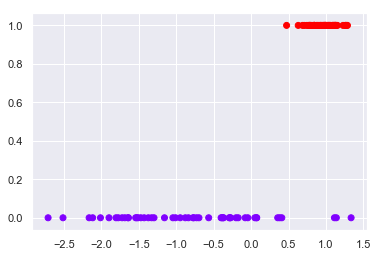

In [42]:
plt.scatter(x, y, c=y, cmap='rainbow')

### Splitting the dataset into training and test data

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

### Creating an instance of logistic regression and fitting the data on it

In [44]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Printing the values for the coefficient and intercept

In [45]:
print(lr.coef_)
print(lr.intercept_)

[[2.6971659]]
[-0.72309418]


### Predicting values

In [46]:
y_pred = lr.predict(x_test)

### Observing the confusion matrix

In [47]:
confusion_matrix(y_test, y_pred)

array([[ 8,  2],
       [ 0, 15]], dtype=int64)

### We can see the probabilities that the predict function used for making decision using the method 'predict_proba' for the test examples used

In [48]:
lr.predict_proba(x_test)

array([[0.21650154, 0.78349846],
       [0.09156531, 0.90843469],
       [0.13055392, 0.86944608],
       [0.99626917, 0.00373083],
       [0.09585899, 0.90414101],
       [0.11246852, 0.88753148],
       [0.05322329, 0.94677671],
       [0.09186224, 0.90813776],
       [0.90462943, 0.09537057],
       [0.97898618, 0.02101382],
       [0.20182035, 0.79817965],
       [0.08979012, 0.91020988],
       [0.06446735, 0.93553265],
       [0.13572184, 0.86427816],
       [0.13977031, 0.86022969],
       [0.44132251, 0.55867749],
       [0.20636528, 0.79363472],
       [0.14591669, 0.85408331],
       [0.96897847, 0.03102153],
       [0.13025518, 0.86974482],
       [0.62894596, 0.37105404],
       [0.71830816, 0.28169184],
       [0.10549912, 0.89450088],
       [0.69870898, 0.30129102],
       [0.84910588, 0.15089412]])

### Below we construct a dataframe using our test data and then we plot the sigmoid function and observe how the data has been fitted

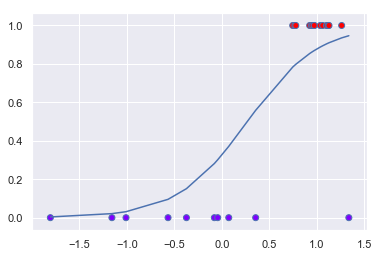

In [49]:
df = pd.DataFrame({'x': x_test[:,0], 'y': y_test})
df = df.sort_values(by='x')
from scipy.special import expit
sigmoid_function = expit(df['x'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')